### Packages and Data import

In [1]:
# import packages

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data & preprocess
df = pd.read_csv('../data/creditcard.csv')

df['Hour'] = df['Time'].apply(lambda x: int(np.ceil(float(x)/3600) % 24))
df.drop('Time', axis=1, inplace=True)

df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1


### Sklearn Packages and Train Test Split

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,roc_curve

In [4]:
X = pd.concat([df.iloc[:,-1],df.loc[:,'V1':'Amount']],axis=1)
y = df['Class']

In [5]:
# Scale features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
# train test split mantaining y proportion of classes
'''Stratify = y: It is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.'''

x_train,x_test,y_train,y_test = train_test_split(X,y, stratify=y,test_size=0.30, random_state=1)

print(f'y_train class counts:\n {y_train.value_counts()} \n')
print(f'y_test class counts:\n {y_test.value_counts()}')

y_train class counts:
 0    199020
1       344
Name: Class, dtype: int64 

y_test class counts:
 0    85295
1      148
Name: Class, dtype: int64


# Parametric Models

## Logistic Regression

In [7]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
pred_lr = lr_model.predict(x_test)

In [8]:
print('True Classes')
print([y_test.value_counts()[0],0],'\n' ,[0,y_test.value_counts()[1]])
print('\n')
print('Predicted Classes')
print(confusion_matrix(y_test,pred_lr))

True Classes
[85295, 0] 
 [0, 148]


Predicted Classes
[[85284    11]
 [   46   102]]


In [9]:
cnf_matrix = confusion_matrix(y_test,pred_lr)

print(classification_report(y_test,pred_lr, target_names=['Non-fraud','Fraud']))

              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     85295
       Fraud       0.90      0.69      0.78       148

    accuracy                           1.00     85443
   macro avg       0.95      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443



Text(0.5, 1.0, 'Logistic Regression Classification')

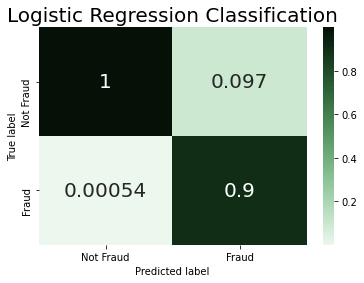

In [10]:
cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)

sns.heatmap(cm_marginal,
            annot=True,
            annot_kws={"size": 20},
            cmap = sns.cubehelix_palette(start=2, rot=0, dark=0.05, light=.95, reverse=False, as_cmap=True),
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Logistic Regression Classification",fontsize=20)

## Support Vector machine

In [11]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train,y_train)
pred_svm = svm_model.predict(x_test)

In [16]:
print('True Classes')
print([y_test.value_counts()[0],0],'\n' ,[0,y_test.value_counts()[1]])
print('\n')
print('Predicted Classes')
print(confusion_matrix(y_test,pred_svm))

True Classes
[85295, 0] 
 [0, 148]


Predicted Classes
[[85288     7]
 [   40   108]]


In [17]:
cnf_matrix = confusion_matrix(y_test,pred_svm)

print(classification_report(y_test,pred_svm, target_names=['Non-fraud','Fraud']))

              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     85295
       Fraud       0.94      0.73      0.82       148

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Text(0.5, 1.0, 'Support Vector Machine Classification')

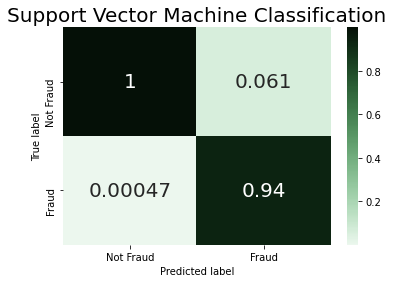

In [18]:
cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)

sns.heatmap(cm_marginal,
            annot=True,
            annot_kws={"size": 20},
            cmap = sns.cubehelix_palette(start=2, rot=0, dark=0.05, light=.95, reverse=False, as_cmap=True),
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Support Vector Machine Classification",fontsize=20)

## Ridge Regression